In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, seed
import warnings
warnings.filterwarnings('ignore')

# Step 3

In [ ]:
df = yf.download(['JPM','WFC', 'BAC', 'C', 'GS',
'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR', 'PFE', 'XOM', 'WMT',
'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS'], start = '2008-09-01', end = '2008-10-31')

#HCP, STI, BBT
df = df['Close']
df_ret = df.pct_change()
df_ret.dropna(inplace = True)
df_ret.head()

[*********************100%%**********************]  27 of 27 completed


Ticker,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03,0.010720,0.006891,0.010113,0.026164,-0.011756,0.016474,-0.018526,-0.006543,-0.012687,-0.009883,...,0.002270,0.001565,0.009259,0.026601,0.059281,0.001241,0.017918,-0.006408,0.002347,0.009053
2008-09-04,0.023725,-0.052799,-0.071602,-0.066803,0.001487,-0.051029,-0.044187,-0.016465,0.009930,-0.033063,...,-0.033646,-0.027604,-0.018484,-0.031950,-0.065138,-0.026848,-0.039454,-0.043212,-0.000167,-0.024096
2008-09-05,0.012724,0.016774,0.053268,0.042076,-0.009651,0.031849,-0.000898,-0.016741,0.001157,-0.000129,...,-0.007030,-0.008570,0.021168,0.023129,-0.064279,0.022496,0.034439,0.051567,0.016059,-0.006829
2008-09-08,-0.014897,0.028426,0.077567,0.065548,0.030735,0.089913,0.049865,-0.024972,0.032351,0.000258,...,0.016521,0.034036,0.033517,0.078486,-0.008915,0.046907,0.036652,0.075641,0.020744,0.015208
2008-09-09,-0.083994,-0.056268,-0.063634,-0.070866,-0.024000,-0.066284,-0.017116,-0.041909,0.012871,-0.044252,...,-0.046766,-0.047022,-0.051185,-0.060292,-0.020106,-0.068596,-0.055392,-0.071216,-0.014032,-0.045721


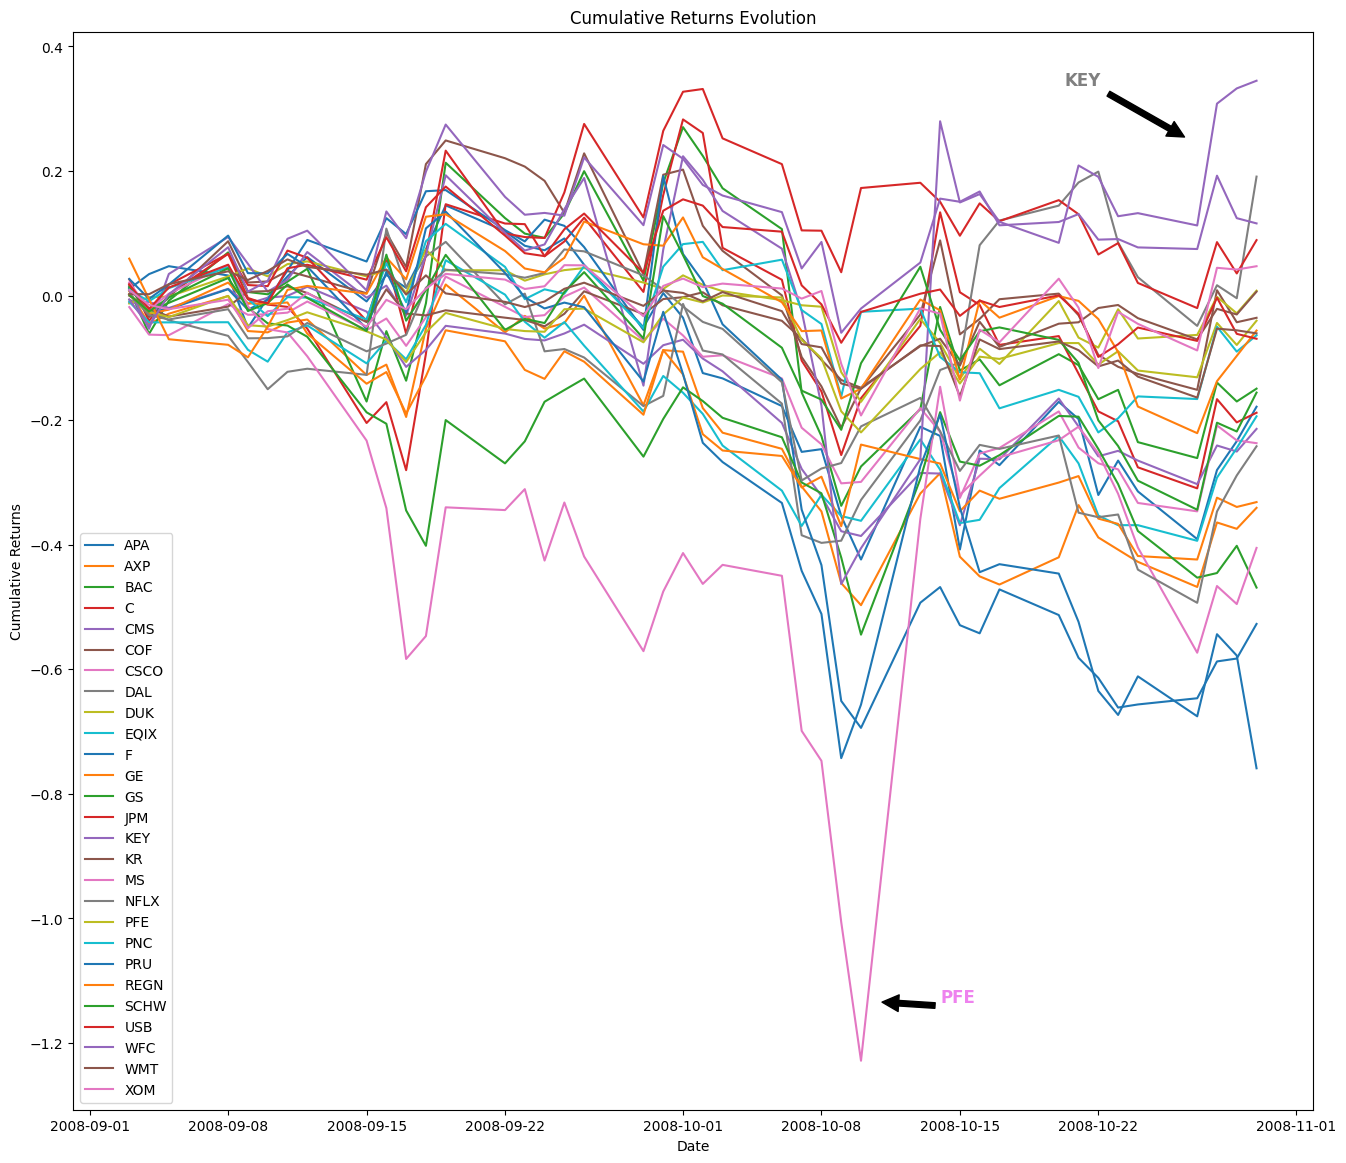

In [ ]:
# Calculate cumulative returns for each column
cumulative_returns = df_ret.cumsum()

# Plot cumulative returns
plt.figure(figsize=(16, 14))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns Evolution')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(df.columns)


# Annotate the best performer (top right)
plt.annotate('KEY', xy=(0.9, 0.9), xycoords='axes fraction',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='gray', weight='bold')

# Annotate the worst performer (bottom right)
plt.annotate('PFE', xy=(0.65, 0.1), xycoords='axes fraction',
            xytext=(0.7, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='violet', weight='bold')

plt.show()

# Step 4

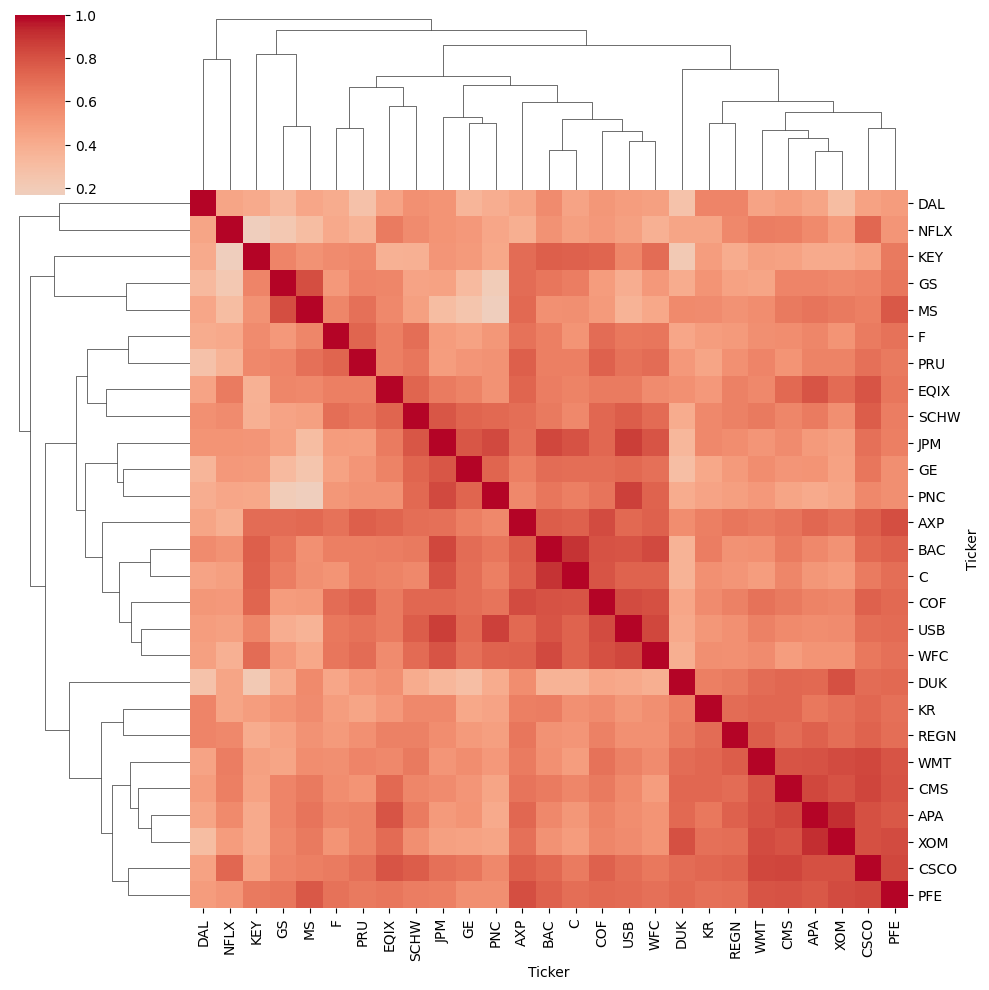

In [ ]:
corr_matrix = df_ret.corr()

# Create a heatmap with clustering
sns.clustermap(corr_matrix, cmap='coolwarm', center=0)

# Show the plot
plt.show()

From the plot we can see that there are two main clusters (as expected financial vs non-financial stocks) but surprisingly there are two smaller clusters (with two and three stocks) that seem to be relatively distant from their peers.

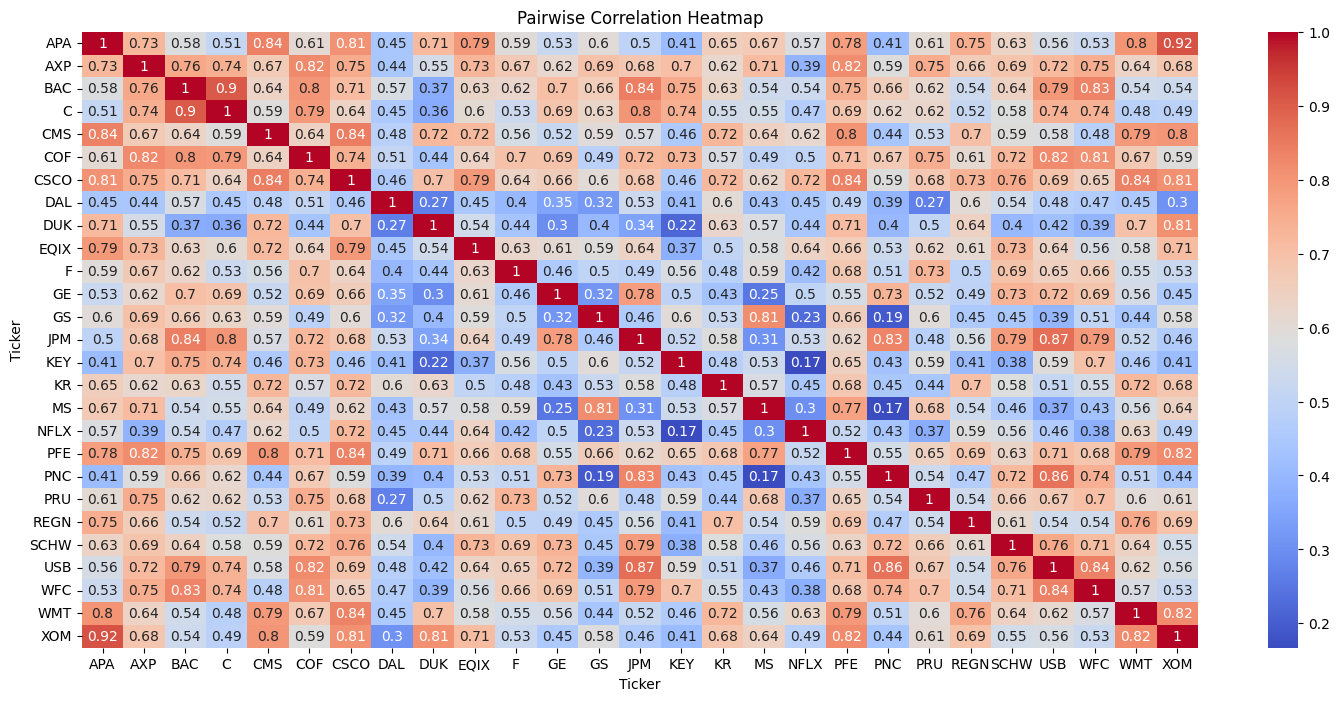

In [ ]:
# Create the heatmap
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Pairwise Correlation Heatmap')

# Show the plot
plt.show()

# Step 6

In [ ]:
YData = df.to_numpy()
YData_dates = pd.to_datetime(df.index, format="%Y-%m-%d")

In [ ]:
def optimal_action_ucb(qvalues, counts, total_t, c):
    nactions = qvalues.shape[0]
    if total_t == 0:
        # If no actions have been taken, pick a random one
        return np.random.randint(nactions)

    ucb_values = np.zeros(nactions)
    for i in range(nactions):
        if counts[i] > 0:
            exploration_value = c * np.sqrt(np.log(total_t) / counts[i])
            ucb_values[i] = qvalues[i] + exploration_value
        else:
            ucb_values[i] = np.inf

    # Select the action with the maximum UCB value
    return np.argmax(ucb_values)




def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new


In [ ]:
#  Upper Confidence Bound (UCB) strategy.
def optimal_action_ucb(qvalues, counts, total_t, c):

    nactions = len(qvalues)
    ucb_values = np.zeros(nactions)
    for i in range(nactions):
        if counts[i] == 0:
            ucb_values[i] = np.inf  # explore all actions initially
        else:
            ucb_values[i] = qvalues[i] + c * np.sqrt(np.log(total_t) / counts[i])
    return np.argmax(ucb_values)

def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new

# Simulation parameters
NK = YData.shape[1]
ALPHA = 0.9
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

np.random.seed(1234)

reward_avg = np.zeros(TMAX)
optimal_avg = np.zeros(TMAX)
counts = np.zeros(NK)

for run in range(NEPISODES):
    qvalue = np.zeros(NK)
    qvalue_up = np.zeros(NK)
    for tt in range(TMAX):
        total_t = run * TMAX + tt  # Updated total_t calculation
        aa_opt = optimal_action_ucb(qvalue_up, counts, total_t, c=2)
        counts[aa_opt] += 1

        # Compute reward
        reward = (YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]) / YData[tt, aa_opt]
        qvalue = reward_update(aa_opt, reward, qvalue, ALPHA)

        # Update upper-confidence values
        for aa in range(NK):
            if counts[aa] == 0:
                qvalue_up[aa] = np.max(qvalue) + 1.0  # Ensure unselected actions are considered
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(total_t + 1) / counts[aa])

        reward_avg[tt] += reward / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])) / NEPISODES

# Plotting or further analysis can be done here


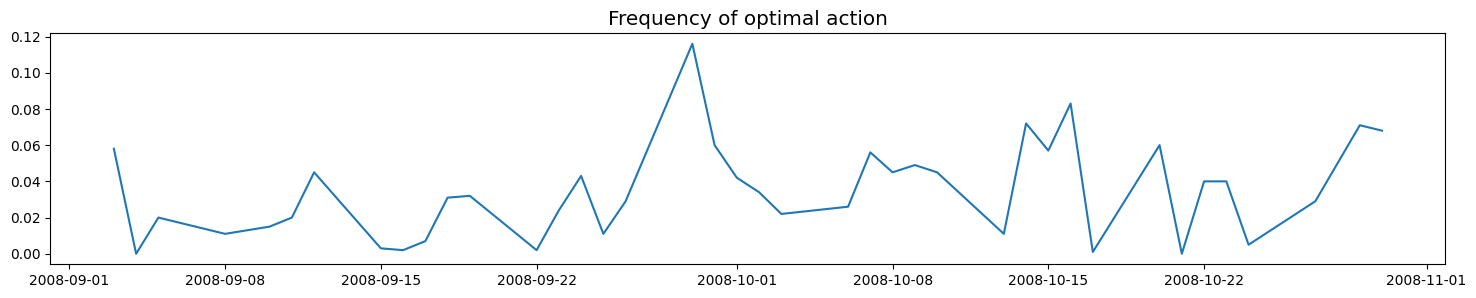

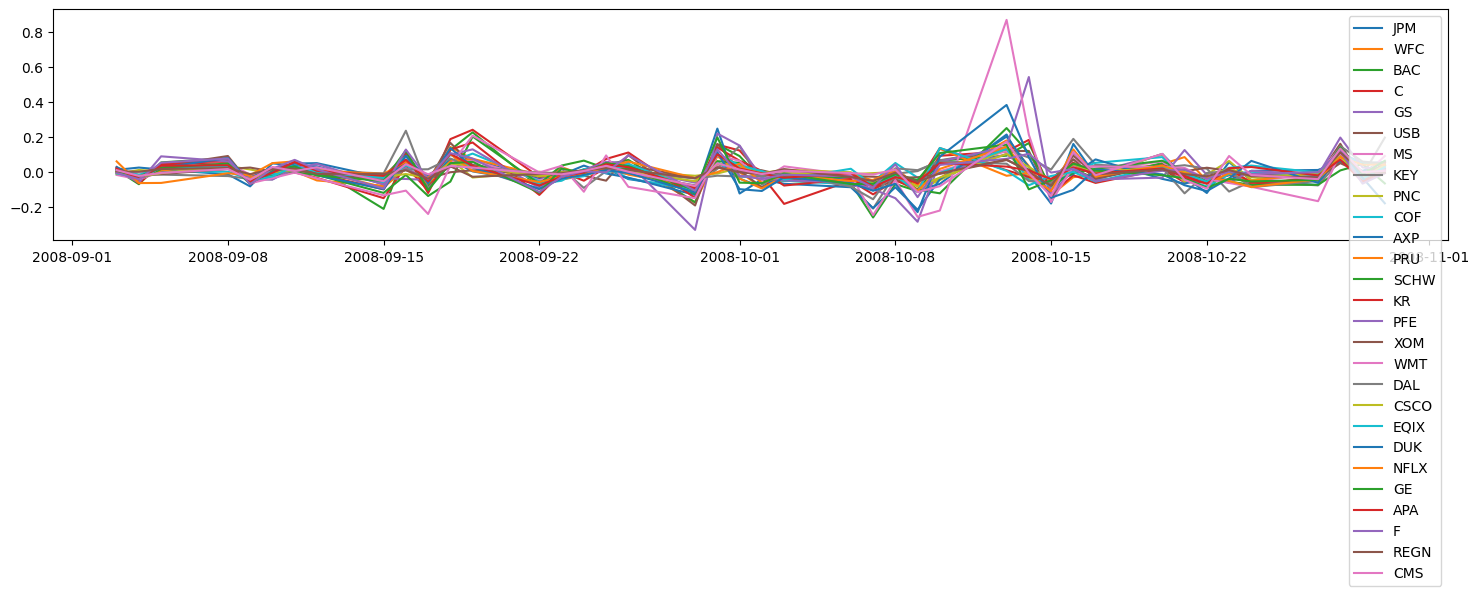

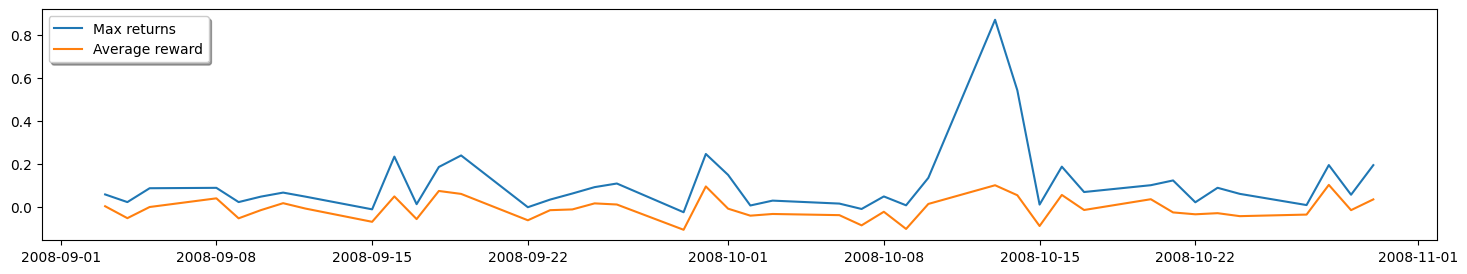

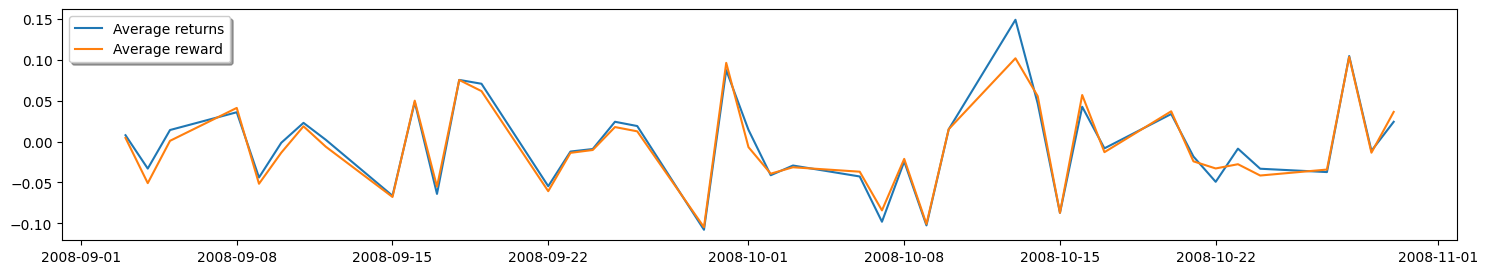

0.0344761904761905
-0.578780038204185 0.8696125042450463
-0.7656924465725269 0.8299208412846247


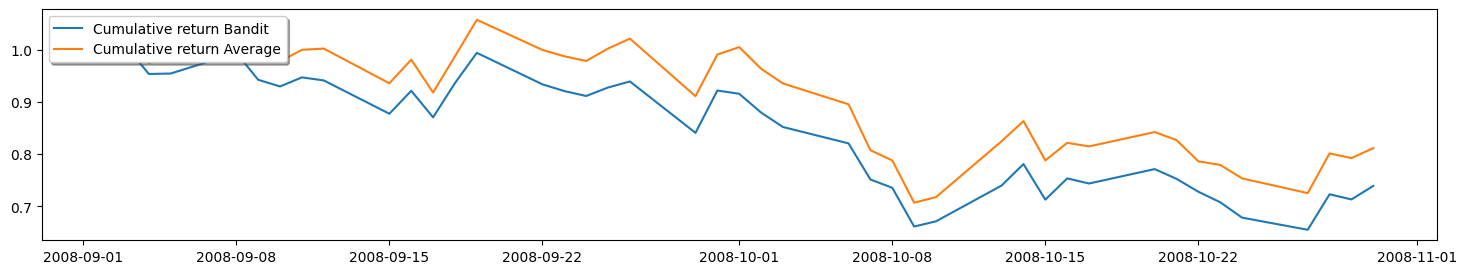

In [ ]:
tickers = ['JPM','WFC', 'BAC', 'C', 'GS',
'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR', 'PFE', 'XOM', 'WMT',
'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']


plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
)  # noQA E203
plt.legend(tickers)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Step 8


In [ ]:
#Epsilon Greedy Algorithm Implementation
import numpy as np

class EpsilonGreedyAgent:
    def __init__(self, epsilon, num_actions):
        self.epsilon = epsilon
        self.num_actions = num_actions
        self.Q_values = np.zeros(num_actions)

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            # Choose a random action
            return np.random.randint(self.num_actions)
        else:
            # Choose the action with the highest Q-value
            return np.argmax(self.Q_values)

    def update_Q_value(self, action, reward, alpha):
        # Update the Q-value for the chosen action
        self.Q_values[action] += alpha * (reward - self.Q_values[action])

# Example usage:
epsilon = 0.1
num_actions = 3
agent = EpsilonGreedyAgent(epsilon, num_actions)

# Simulating an episode
for _ in range(10):
    action = agent.choose_action()
    reward = np.random.normal(0, 1)  # Simulated reward
    agent.update_Q_value(action, reward, 0.1)  # alpha is 0.1
    print("Chosen action:", action, " Reward:", reward)

print("Q-values:", agent.Q_values)


Chosen action: 0  Reward: 1.8236154920106034
Chosen action: 0  Reward: -2.25969970111849
Chosen action: 1  Reward: 1.8871327542605232
Chosen action: 1  Reward: -1.756462058958304
Chosen action: 0  Reward: 1.0475785728927218
Chosen action: 0  Reward: 1.0459382556276653
Chosen action: 0  Reward: 0.8637172916848387
Chosen action: 1  Reward: -0.12209157484767426
Chosen action: 0  Reward: -0.07051305197034868
Chosen action: 0  Reward: 0.32539432310731303
Q-values: [ 0.20461628 -0.01743299  0.        ]


#Step 9

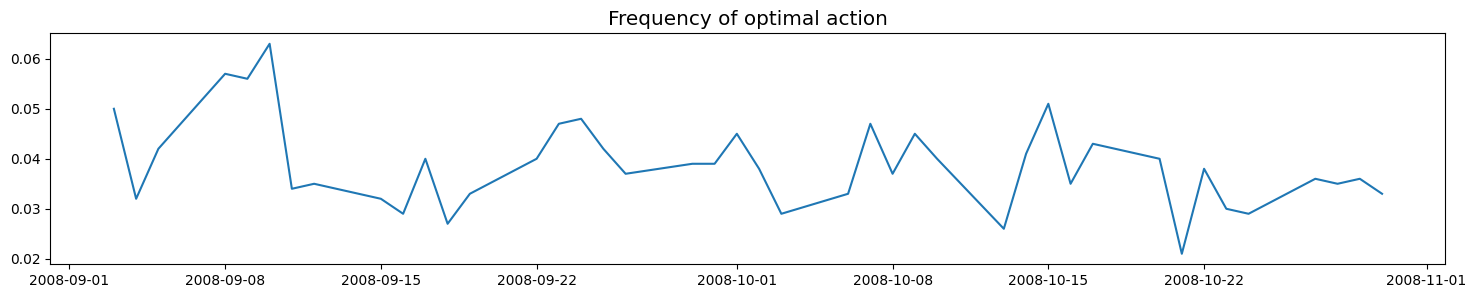

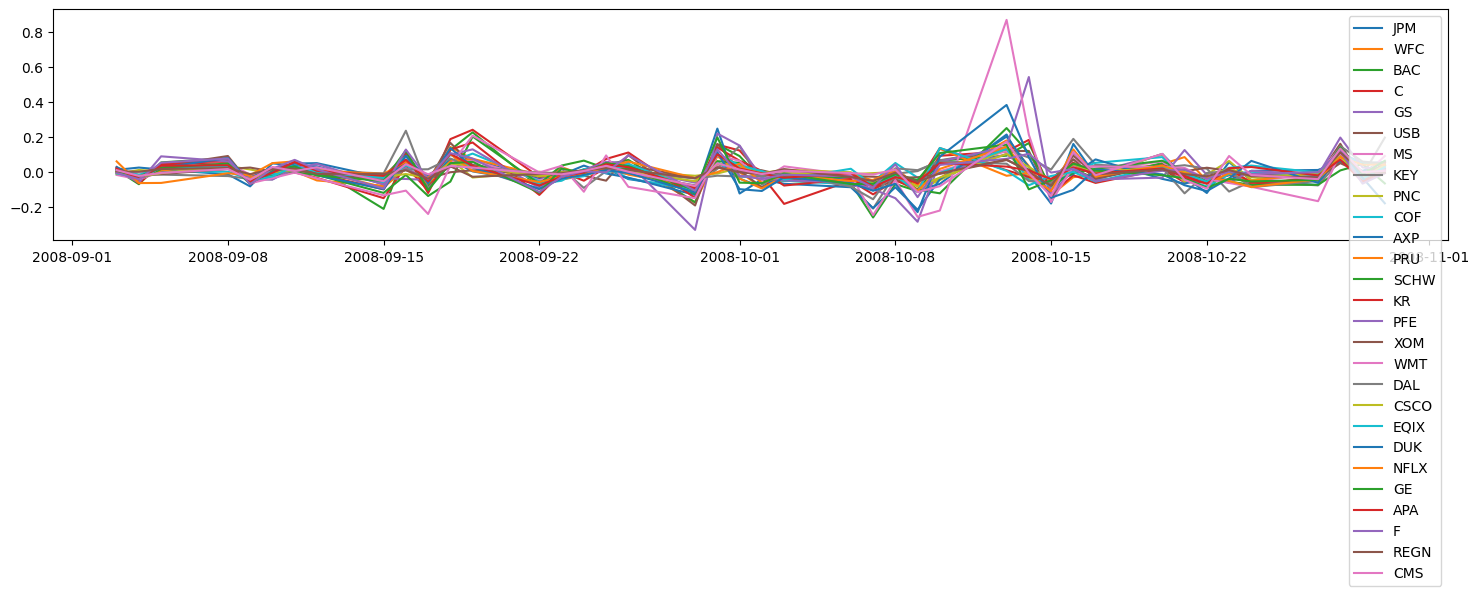

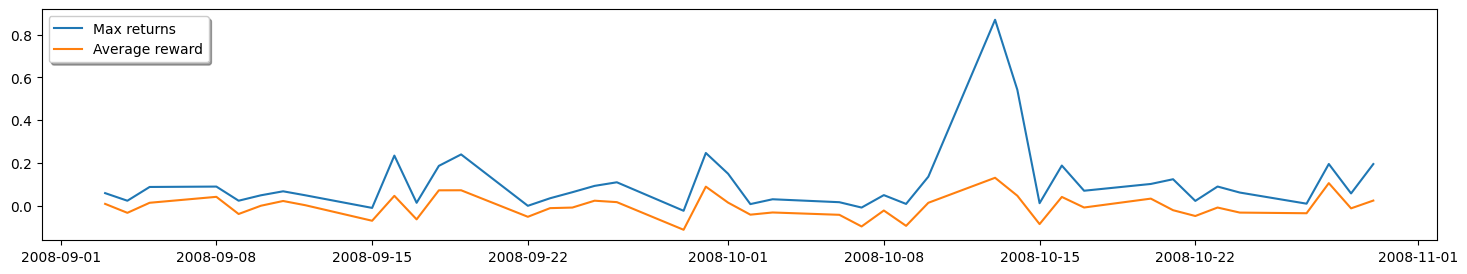

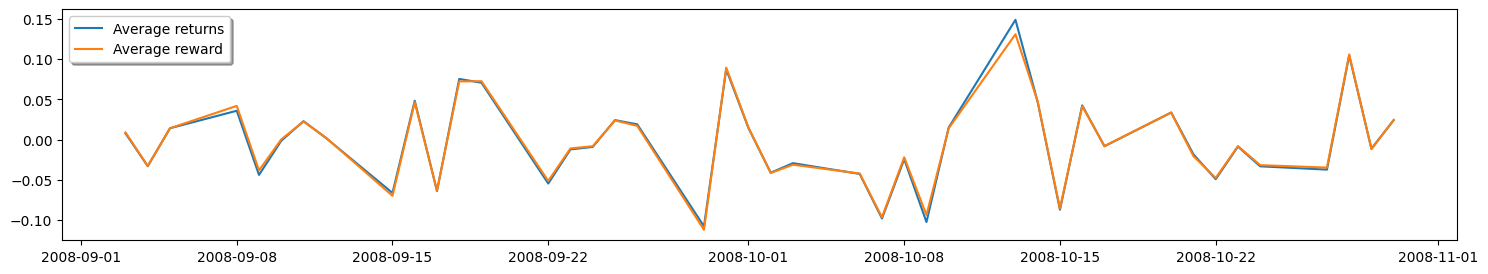

0.038809523809523835
-0.578780038204185 0.8696125042450463
-0.5574315384662665 0.8472035376800606


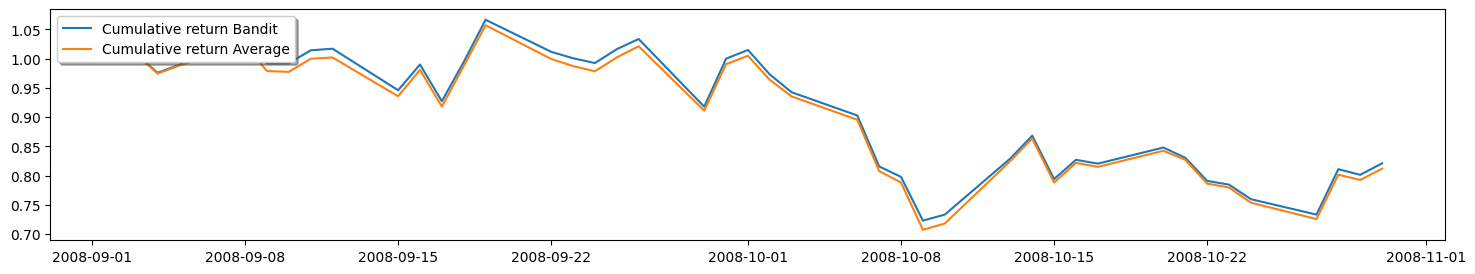

In [ ]:
YData = df.to_numpy()
YData_dates = pd.to_datetime(df.index, format="%Y-%m-%d")

#Bandit problem for stock selection


def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

NK = 27
EPSILON = 0.1
ALPHA = 0.975
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

np.random.seed(1234)




reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203

tickers = ['JPM','WFC', 'BAC', 'C', 'GS',
'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR', 'PFE', 'XOM', 'WMT',
'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']


plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
)  # noQA E203
plt.legend(tickers)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#Step 10


In [3]:
df = yf.download(['JPM','WFC', 'BAC', 'C', 'GS',
'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR', 'PFE', 'XOM', 'WMT',
'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS'], start = '2020-03-01', end = '2020-04-30')

#HCP, STI, BBT
df = df['Close'].pct_change()
df.dropna(inplace = True)
df.head()

[*********************100%%**********************]  27 of 27 completed


Ticker,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,-0.020768,-0.051462,-0.055158,-0.037579,0.002806,-0.055209,-0.027447,-0.020780,-0.010965,-0.006011,...,-0.032227,-0.016628,-0.053905,-0.056561,-0.006885,-0.087661,-0.042774,-0.040937,-0.025630,-0.047884
2020-03-04,0.005602,0.071197,0.023063,0.035972,0.062655,0.033673,0.033716,0.050238,0.063173,0.049304,...,0.040730,0.061224,0.031158,0.028111,0.069180,-0.029765,0.012148,0.021466,0.034187,0.021832
2020-03-05,-0.031436,-0.041141,-0.056710,-0.057872,-0.009071,-0.047576,-0.043972,-0.071959,-0.014953,-0.044648,...,-0.028688,-0.025824,-0.067311,-0.063626,-0.010760,-0.063509,-0.061723,-0.060386,-0.007279,-0.044067
2020-03-06,-0.149548,-0.024338,-0.039955,-0.034809,0.002362,-0.032793,0.002780,0.019551,-0.010786,-0.012973,...,-0.010220,-0.012408,-0.053526,-0.033905,0.012823,-0.019253,-0.030379,-0.046530,0.011301,-0.048294
2020-03-09,-0.538647,-0.091925,-0.147024,-0.161717,-0.036382,-0.112043,-0.043347,-0.051645,-0.045129,-0.056862,...,-0.060926,-0.035979,-0.135516,-0.165736,-0.040430,-0.113097,-0.144405,-0.124292,-0.000597,-0.122248


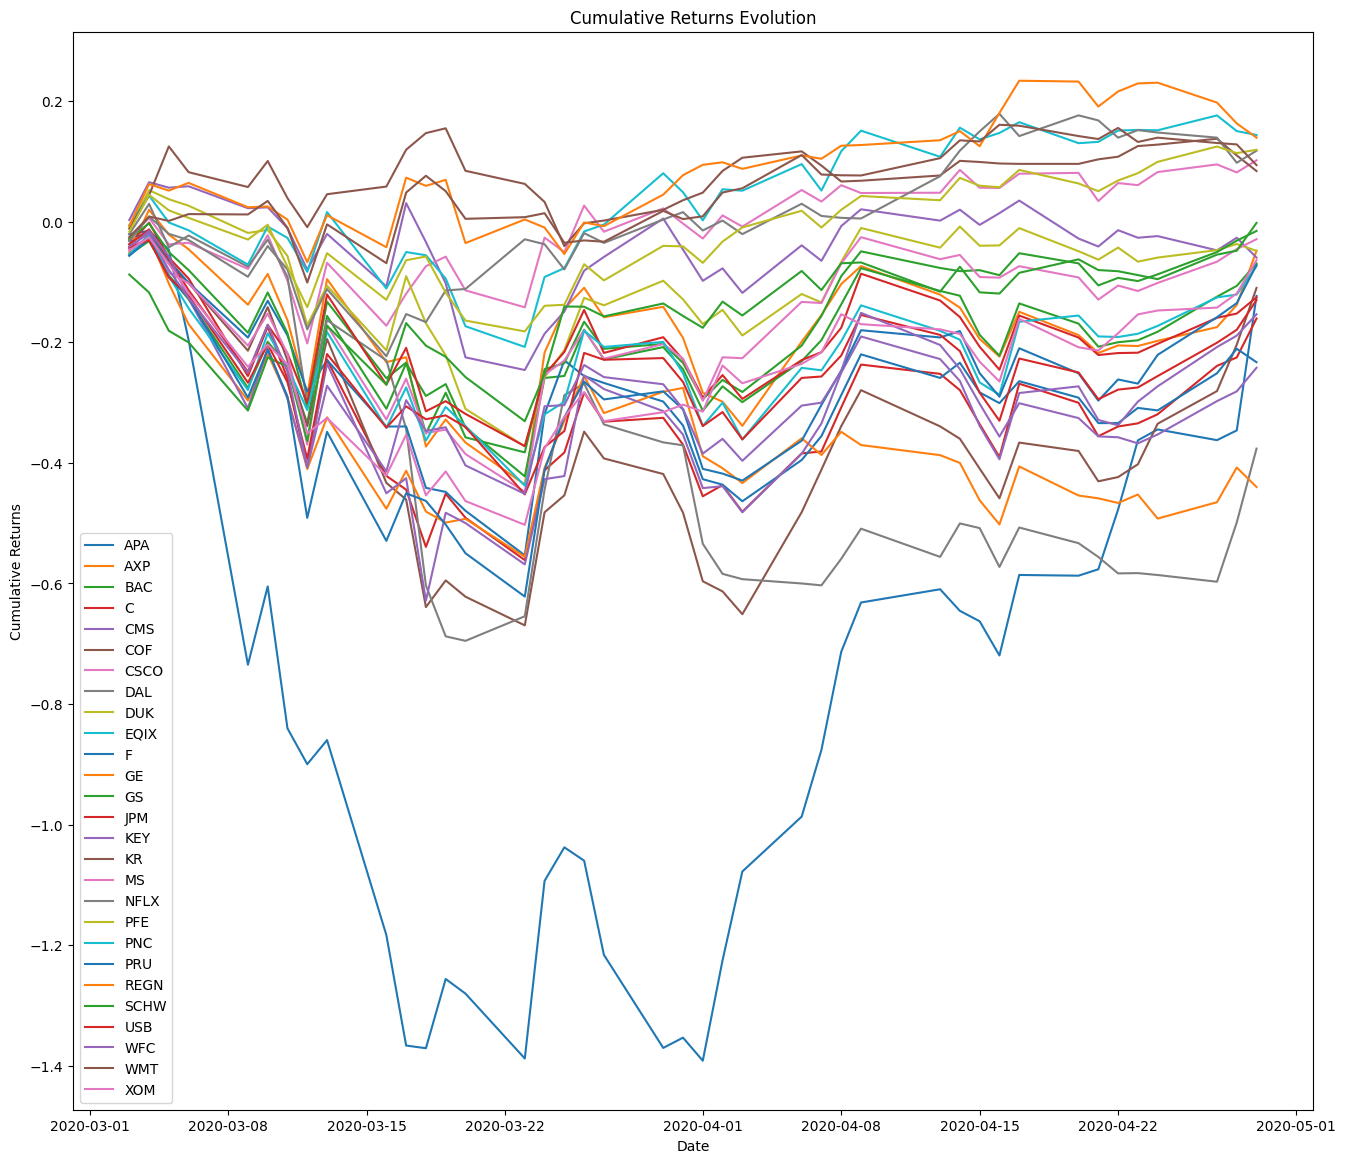

In [6]:
# Calculate cumulative returns for each column
import matplotlib.pyplot as plt
cumulative_returns = df.cumsum()

# Plot cumulative returns
plt.figure(figsize=(16, 14))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns Evolution')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(df.columns)

End
